## EXP5
Develop a linear regression model for forecasting time series data.


In [ ]:
 pip install yfinance statsmodels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df=yf.download("GOOGL", start="2010-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2010-01-04,15.609804,15.678545,15.547291,15.614785,78169752
2010-01-05,15.541063,15.636952,15.480044,15.620514,120067812
2010-01-06,15.149293,15.587637,15.101972,15.587637,158988852
2010-01-07,14.796625,15.192631,14.760512,15.177686,256315428
2010-01-08,14.993881,15.024515,14.672344,14.744323,188783028


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
count,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,61.149777,61.762884,60.509864,61.128255,5.617230e+07
std,46.638356,47.144306,46.121781,46.612714,4.749974e+07
min,10.860739,11.015403,10.799967,10.916527,9.312000e+06
25%,22.581481,22.738202,22.425690,22.600906,2.733450e+07
50%,47.151819,47.410334,46.778849,47.140871,3.768900e+07
75%,93.473114,94.761576,91.813419,93.317732,7.315977e+07
max,196.433777,201.188288,194.755694,197.023087,5.923990e+08


In [ ]:
# Extract features
df['Month'] = df.index.month
df['Year'] = df.index.year

In [ ]:
# Target variable (closing stock price)
X = df[['Year', 'Month']]
y = df['Close']

In [ ]:
# Train-test split (no shuffling for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 30.42
Mean Squared Error (MSE): 1344.76
Root Mean Squared Error (RMSE): 36.67
R² Score: -0.8083


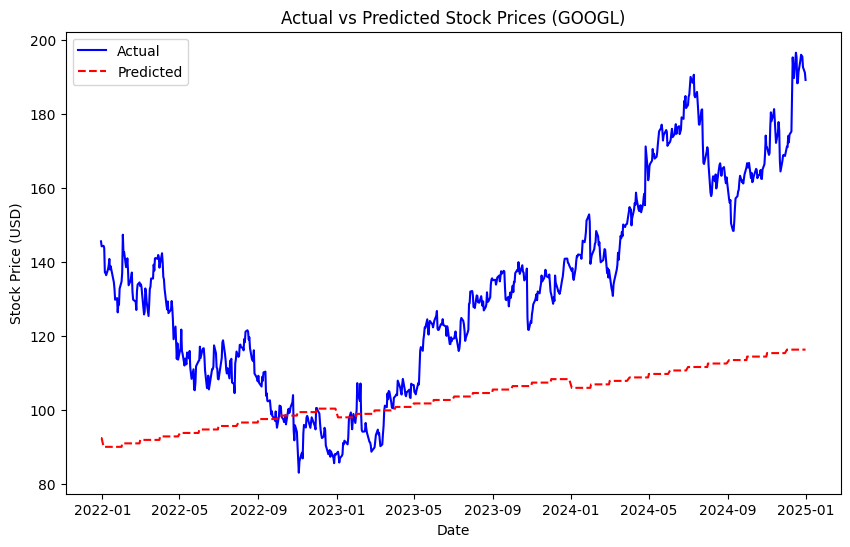

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test, label="Actual", color="blue")
plt.plot(df.index[-len(y_test):], y_pred, label="Predicted", linestyle="--", color="red")
plt.title("Actual vs Predicted Stock Prices (GOOGL)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()